# Error Rates

## 1. Measure Error Rate in matching Record Pair

### 1.1  Error = Number of unequal attributes

In [66]:
import matplotlib.pyplot as plt
import pandas as pd

In [67]:
def skip_xlabels(bp, number):
    if len(bp.get_xticklabels()) > number:
        skip = round(len(bp.get_xticklabels()) / number)
        for ind, label in enumerate(bp.get_xticklabels()):
            if ind % skip == 0:
                label.set_visible(True)
            else:
                label.set_visible(False)

In [68]:
# get the data
filepath = "data/2023_NCVR_Panse_1M/records.csv"
#filepath = "data/2021_NCVR_Panse_001/dataset_ncvr_dirty.csv"
col_names = "sourceID,globalID,localID,FIRSTNAME,MIDDLENAME,LASTNAME,YEAROFBIRTH,PLACEOFBIRTH,COUNTRY,CITY,PLZ,STREET,GENDER,ETHNIC,RACE".split(",")
df = pd.read_csv(filepath, names=col_names, dtype={"PLZ": str, "YEAROFBIRTH": int},
                              keep_default_na=False)
df.shape[0]

1000000

In [69]:
# split dataset
df1 = df[df.sourceID == "A"]
df2 = df[df.sourceID == "B"]

In [70]:
# get all matching record pairs
matches1 = df1[df1.globalID.isin(df2.globalID)]
matches2 = df2[df2.globalID.isin(df1.globalID)]
pairs = matches1.merge(matches2, on="globalID", suffixes=["_a", "_b"])
pairs.head()

,sourceID_a,globalID,localID_a,FIRSTNAME_a,MIDDLENAME_a,LASTNAME_a,YEAROFBIRTH_a,PLACEOFBIRTH_a,COUNTRY_a,CITY_a,...,LASTNAME_b,YEAROFBIRTH_b,PLACEOFBIRTH_b,COUNTRY_b,CITY_b,PLZ_b,STREET_b,GENDER_b,ETHNIC_b,RACE_b
0,A,DL182913,nAPFnWpTG5tu1COS,AMY,DENISE,BOGEY,1986,NC,PITT,WINTERVILLE,...,BECIROVIC,1986,NC,PITT,WINTERVILLE,28590,DUBLIN,F,NL,W
1,A,EH916944,vf0oJmDbtRZ4cPMG,ISMAEL,TEXIDOR,MARTINEZ,1982,PR,WAKE,RALEIGH,...,TEXIDOR MARTINEZ,1982,PR,WAKE,RALEIGH,27616,WORSHAM,M,NL,O
2,A,BY612694,FZ04uIoOfqXn8oPd,DAVID,,HAYES,1964,NC,GUILFORD,HIGH POINT,...,HAYES,1964,,FORSYTH,KERNERSVILLE,27284,PAYNE,U,UN,U
3,A,BH111531,gJXMESATxCyeMn1B,HEATHER,CURTIS,HALL,1970,VA,DAVIDSON,WINSTON-SALEM,...,CURTIS,1970,VA,DAVIDSON,WINSTON-SALEM,27127,MALLARD VIEW,F,NL,W
4,A,EH473223,51t3b3gJNqdM8Xfp,STACEE,YULANDA,POWELL,1982,NC,SAMPSON,CLINTON,...,CARR,1982,NC,SAMPSON,CLINTON,28328,FAISON,F,NL,B


In [71]:
attrs = col_names[3:]
def count_errors(row):
    errors = 0
    for attr in attrs:
        if row[attr + "_a"] != row[attr + "_b"]:
            errors += 1
    return errors

pairs["errors"] = pairs.apply(count_errors, axis=1)
pairs.head()

,sourceID_a,globalID,localID_a,FIRSTNAME_a,MIDDLENAME_a,LASTNAME_a,YEAROFBIRTH_a,PLACEOFBIRTH_a,COUNTRY_a,CITY_a,...,YEAROFBIRTH_b,PLACEOFBIRTH_b,COUNTRY_b,CITY_b,PLZ_b,STREET_b,GENDER_b,ETHNIC_b,RACE_b,errors
0,A,DL182913,nAPFnWpTG5tu1COS,AMY,DENISE,BOGEY,1986,NC,PITT,WINTERVILLE,...,1986,NC,PITT,WINTERVILLE,28590,DUBLIN,F,NL,W,4
1,A,EH916944,vf0oJmDbtRZ4cPMG,ISMAEL,TEXIDOR,MARTINEZ,1982,PR,WAKE,RALEIGH,...,1982,PR,WAKE,RALEIGH,27616,WORSHAM,M,NL,O,2
2,A,BY612694,FZ04uIoOfqXn8oPd,DAVID,,HAYES,1964,NC,GUILFORD,HIGH POINT,...,1964,,FORSYTH,KERNERSVILLE,27284,PAYNE,U,UN,U,7
3,A,BH111531,gJXMESATxCyeMn1B,HEATHER,CURTIS,HALL,1970,VA,DAVIDSON,WINSTON-SALEM,...,1970,VA,DAVIDSON,WINSTON-SALEM,27127,MALLARD VIEW,F,NL,W,2
4,A,EH473223,51t3b3gJNqdM8Xfp,STACEE,YULANDA,POWELL,1982,NC,SAMPSON,CLINTON,...,1982,NC,SAMPSON,CLINTON,28328,FAISON,F,NL,B,3


In [72]:
pairs = pairs.reindex(sorted(pairs.columns), axis=1)
pairs.head()

,CITY_a,CITY_b,COUNTRY_a,COUNTRY_b,ETHNIC_a,ETHNIC_b,FIRSTNAME_a,FIRSTNAME_b,GENDER_a,GENDER_b,...,STREET_a,STREET_b,YEAROFBIRTH_a,YEAROFBIRTH_b,errors,globalID,localID_a,localID_b,sourceID_a,sourceID_b
0,WINTERVILLE,WINTERVILLE,PITT,PITT,UN,NL,AMY,AMY,F,F,...,PATTON,DUBLIN,1986,1986,4,DL182913,nAPFnWpTG5tu1COS,HKnmvmMyL3ys5JpW,A,B
1,RALEIGH,RALEIGH,WAKE,WAKE,NL,NL,ISMAEL,ISMAEL,M,M,...,WORSHAM,WORSHAM,1982,1982,2,EH916944,vf0oJmDbtRZ4cPMG,nAd5oRXbbqcarcbV,A,B
2,HIGH POINT,KERNERSVILLE,GUILFORD,FORSYTH,UN,UN,DAVID,DAVID,M,U,...,FRANCIS,PAYNE,1964,1964,7,BY612694,FZ04uIoOfqXn8oPd,Dv45W64y4UxBkTlw,A,B
3,WINSTON-SALEM,WINSTON-SALEM,DAVIDSON,DAVIDSON,NL,NL,HEATHER,HEATHER,F,F,...,MALLARD VIEW,MALLARD VIEW,1970,1970,2,BH111531,gJXMESATxCyeMn1B,Ry4tJiaKyZhGK9D5,A,B
4,CLINTON,CLINTON,SAMPSON,SAMPSON,NL,NL,STACEE,STACEE,F,F,...,SHAUN,FAISON,1982,1982,3,EH473223,51t3b3gJNqdM8Xfp,5JyOSQArr6rn84DQ,A,B


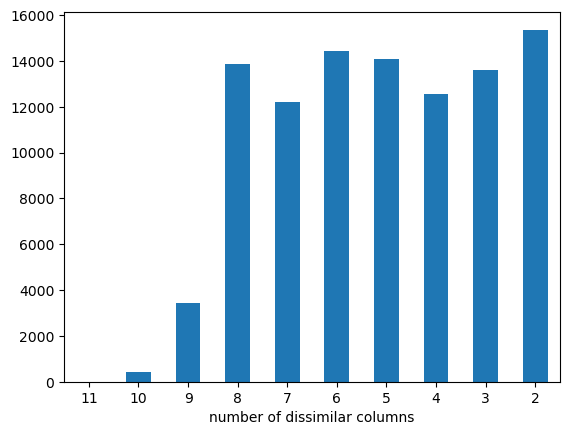

In [73]:
b = pairs.errors.value_counts().sort_index(ascending=False).plot.bar()
b.set_xlabel("number of dissimilar columns")
plt.xticks(rotation=0)
plt.savefig("plots/error-rates/count-errors.png")

#### Observation:
Number of errors and frequency are linearly correlated

### 1.2 Errors = average edit-distance across the two rows

In [74]:
import nltk
s1 = "abc"
s2 = "ebcd"
nltk.edit_distance(s1, s2) # output: 2

2

In [75]:
import numpy as np

def avg_edit_distance(row):
    return np.mean(
        [nltk.edit_distance(str(row[attr + "_a"]), str(row[attr + "_b"]))
         for attr in attrs]
    )

In [76]:
pairs["avg_edit_d"] = pairs.apply(avg_edit_distance, axis=1)
pairs.head()

,CITY_a,CITY_b,COUNTRY_a,COUNTRY_b,ETHNIC_a,ETHNIC_b,FIRSTNAME_a,FIRSTNAME_b,GENDER_a,GENDER_b,...,STREET_b,YEAROFBIRTH_a,YEAROFBIRTH_b,errors,globalID,localID_a,localID_b,sourceID_a,sourceID_b,avg_edit_d
0,WINTERVILLE,WINTERVILLE,PITT,PITT,UN,NL,AMY,AMY,F,F,...,DUBLIN,1986,1986,4,DL182913,nAPFnWpTG5tu1COS,HKnmvmMyL3ys5JpW,A,B,1.666667
1,RALEIGH,RALEIGH,WAKE,WAKE,NL,NL,ISMAEL,ISMAEL,M,M,...,WORSHAM,1982,1982,2,EH916944,vf0oJmDbtRZ4cPMG,nAd5oRXbbqcarcbV,A,B,1.250000
2,HIGH POINT,KERNERSVILLE,GUILFORD,FORSYTH,UN,UN,DAVID,DAVID,M,U,...,PAYNE,1964,1964,7,BY612694,FZ04uIoOfqXn8oPd,Dv45W64y4UxBkTlw,A,B,2.583333
3,WINSTON-SALEM,WINSTON-SALEM,DAVIDSON,DAVIDSON,NL,NL,HEATHER,HEATHER,F,F,...,MALLARD VIEW,1970,1970,2,BH111531,gJXMESATxCyeMn1B,Ry4tJiaKyZhGK9D5,A,B,1.000000
4,CLINTON,CLINTON,SAMPSON,SAMPSON,NL,NL,STACEE,STACEE,F,F,...,FAISON,1982,1982,3,EH473223,51t3b3gJNqdM8Xfp,5JyOSQArr6rn84DQ,A,B,1.500000


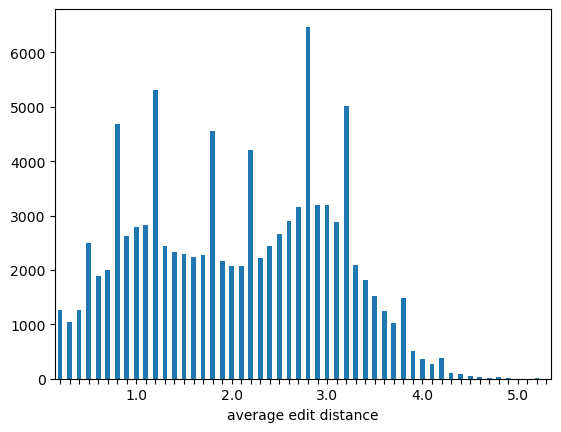

In [77]:
b = pairs.apply(lambda row: round(row.avg_edit_d, ndigits=1), axis=1).value_counts().sort_index().plot.bar()
# d = pairs.avg_edit_d.value_counts().sort_index(ascending=False)
# plt.scatter(x=d.index, y=d.tolist(), s=6)
for label in b.get_xticklabels():
            if int(float(label.get_text())) == float(label.get_text()):
                label.set_visible(True)
            else:
                label.set_visible(False)
plt.xticks(rotation=0)
b.set_xlabel("average edit distance")
plt.savefig("plots/error-rates/edit-distance.png")

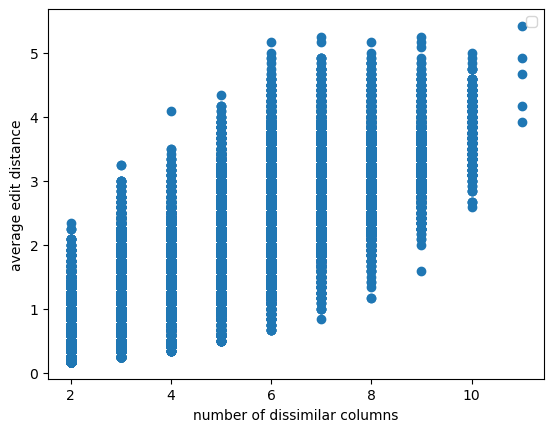

In [78]:
p = pairs.plot(x='errors', y='avg_edit_d', style='o')
p.set_xlabel("number of dissimilar columns")
p.set_ylabel("average edit distance")
p.legend([])
plt.savefig("plots/error-rates/correlation.png")

### Observation:
Apparent correlation between number of errors and edit-distance

### Wrap it up

In [79]:
def get_pairs(df_a: pd.DataFrame, df_b: pd.DataFrame, global_id_col_name="globalID", suffixes=None) -> pd.DataFrame:
    if suffixes is None:
        suffixes = ["_a", "_b"]
    matches_a, matches_b = get_true_matches(df_a, df_b, global_id_col_name)
    return matches_a.merge(matches_b, on=global_id_col_name, suffixes=suffixes)

def count_errors(row):
    errors = 0
    for attr in attrs:
        if row[attr + "_a"] != row[attr + "_b"]:
            errors += 1
    return errors

def avg_edit_distance(row):
    return np.mean(
        [nltk.edit_distance(str(row[attr + "_a"]), str(row[attr + "_b"]))
         for attr in attrs]
    )

In [80]:
pairs = get_pairs(df1, df2)
pairs.apply(count_errors, axis=1).tolist()

NameError: name 'get_true_matches' is not defined

### Question:
How does the error rate influence the matching quality?
##### TODO

## 2. Create Dataset Variants with different error rates
#### Idea:
* get all matching pairs and respective error rates
* filter pairs by error rate
* -> reduced overlap
* if overlap should be preserved, (random-)sample down the non-matches by the same factor

In [ ]:
from dataset_properties import get_true_matches, split_by_source_id
import pandas as pd
import numpy as np

In [ ]:
# get the data
filepath = "data/2021_NCVR_Panse_001/dataset_ncvr_dirty.csv"
col_names = "sourceID,globalID,localID,FIRSTNAME,MIDDLENAME,LASTNAME,YEAROFBIRTH,PLACEOFBIRTH,COUNTRY,CITY,PLZ,STREET,GENDER,ETHNIC,RACE".split(",")
df = pd.read_csv(filepath, names=col_names, dtype={"PLZ": str, "YEAROFBIRTH": int},
                              keep_default_na=False)
df.shape[0]

In [ ]:
def get_pairs(df_a: pd.DataFrame, df_b: pd.DataFrame, global_id_col_name="globalID", suffixes=None) -> pd.DataFrame:
    if suffixes is None:
        suffixes = ["_a", "_b"]
    matches_a, matches_b = get_true_matches(df_a, df_b, global_id_col_name)
    return matches_a.merge(matches_b, on=global_id_col_name, suffixes=suffixes)

def filter_by_error_rate(df: pd.DataFrame, min_e, max_e, measure: callable, global_id_col_name="globalID", source_id_col_name="sourceID", preserve_overlap=False, seed: int=None):
    """
    Filter all matching pairs so that only those with the specified error rate remain.
    If preserve_overlap = True, sample down non matches to the same factor. In that case, a seed can be specified.
    """
    if not preserve_overlap and seed is not None:
        raise ValueError("Seed should only be specified if preserve_overlap = True.")
    if min_e > max_e:
        raise ValueError("min_e must be smaller or equal to max_e")
    df_a, df_b = split_by_source_id(df, source_id_col_name)
    pairs = get_pairs(df_a, df_b)
    pairs["error"] = pairs.apply(measure, axis=1)
    pairs_filtered = pairs[(pairs["error"] >= min_e) &
                           (pairs["error"] <= max_e)]
    matches_a, matches_b = get_true_matches(df_a, df_b, global_id_col_name)
    matches_a_filtered = matches_a[matches_a[global_id_col_name].isin(pairs_filtered[global_id_col_name])]
    matches_b_filtered = matches_b[matches_b[global_id_col_name].isin(pairs_filtered[global_id_col_name])]
    assert matches_a.shape[0] == matches_b.shape[0]
    assert matches_a_filtered.shape[0] == matches_b_filtered.shape[0]
    non_matches = df[~df[global_id_col_name].isin(pairs[global_id_col_name])]
    if preserve_overlap:
        # scale down non-matches to the same factor
        sample_size = round(non_matches.shape[0] * matches_a_filtered.shape[0] / matches_a.shape[0])
        non_matches = non_matches.sample(sample_size, seed)
    return pd.concat([matches_a_filtered, matches_b_filtered, non_matches])

In [ ]:
def get_attrs(col_names):
    return [c for c in col_names if not c.lower().endswith("id")]

def count_errors(row, attrs):
    errors = 0
    for attr in attrs:
        if row[attr + "_a"] != row[attr + "_b"]:
            errors += 1
    return errors

def avg_edit_distance(row, attrs):
    return np.mean(
        [nltk.edit_distance(str(row[attr + "_a"]), str(row[attr + "_b"]))
         for attr in attrs]
    )

In [ ]:
attrs = get_attrs(col_names)

In [ ]:
min_e, max_e = (1, 1)
measure = lambda row: count_errors(row, attrs)
df_filtered = filter_by_error_rate(df, min_e, max_e, measure)

In [ ]:
df_filtered.shape[0]

In [ ]:
def get_all_errors(df: pd.DataFrame, measure: callable) -> list:
    df1, df2 = split_by_source_id(df)
    pairs = get_pairs(df1, df2)
    return pairs.apply(measure, axis=1).tolist()

def test(df, min_e, max_e, measure):
    df_filtered = filter_by_error_rate(df, min_e, max_e, measure)
    errors = get_all_errors(df_filtered, measure)
    return all([min_e <= e <= max_e for e in errors])

In [ ]:
min_e, max_e = (1, 1)
measure = lambda row: count_errors(row, attrs)
test(df, min_e, max_e, measure)

In [ ]:
for min_e in range(0, 10):
    for max_e in range(min_e, 10):
        print(test(df, min_e, max_e, measure))